In [ ]:
import seaborn as sns
import pandas as pd
import os
import matplotlib.pyplot as plt

In [ ]:
file_list = ['S006.csv','S008.csv','S009.csv','S010.csv','S012.csv','S013.csv','S014.csv','S015_fix.csv','S016.csv',
             'S017.csv','S018.csv','S019.csv','S020.csv','S021_fix.csv','S022.csv','S023_fix.csv','S024.csv','S025.csv',
             'S026.csv','S027.csv','S028.csv','S029.csv',]

In [ ]:
# S006.csv        [00]
# S008.csv        [01]
# S009.csv        [02]
# S010.csv        [03]
# S012.csv        [04]
# S013.csv        [05]
# S014.csv        [06]
# S015_fix.csv    [07]
# S016.csv        [08]
# S017.csv        [09]
# S018.csv        [10]
# S019.csv        [11]
# S020.csv        [12]
# S021_fix.csv    [13]
# S022.csv        [14]
# S023_fix.csv    [15]
# S024.csv        [16]
# S025.csv        [17]
# S026.csv        [18]
# S027.csv        [19]
# S028.csv        [20]
# S029.csv        [21]

In [ ]:
# Append all df's into a single combined dataframe
df_combined = pd.DataFrame()

for file in file_list:
    df = pd.read_csv(os.path.join('harth/', file))
    df_combined = pd.concat([df_combined, df])

df_combined = df_combined.drop('label', axis=1)

In [ ]:
# Αφαίρεση περιττών στηλών
# df = pd.read_csv(os.path.join('harth/', file_list[7]))
# df = df.drop('index', axis=1)
# df.to_csv('harth/S015_fix.csv', index=False)

In [ ]:
# Δημιουργία πινάκων
# df = pd.read_csv(os.path.join('harth/', file_list[0]))
# df.head()
# df.info()
# df_combined.describe()

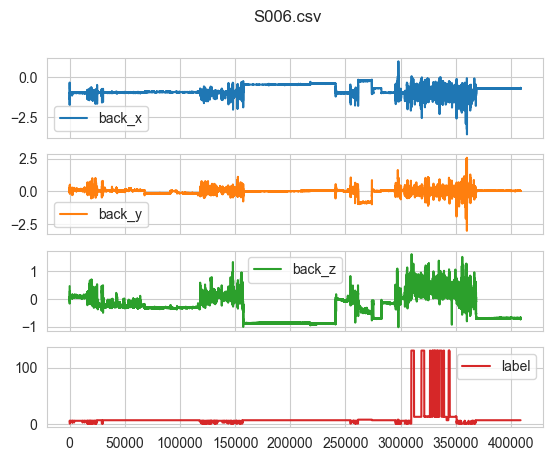

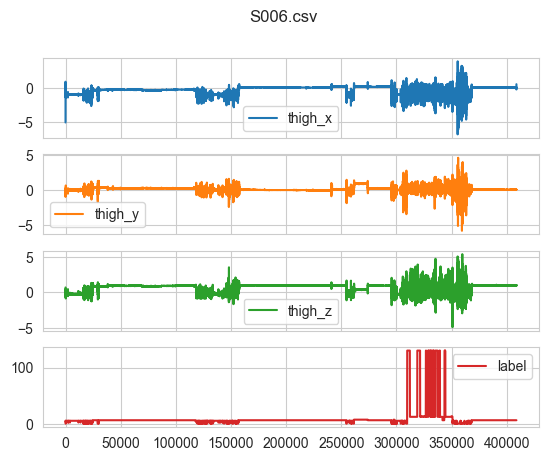

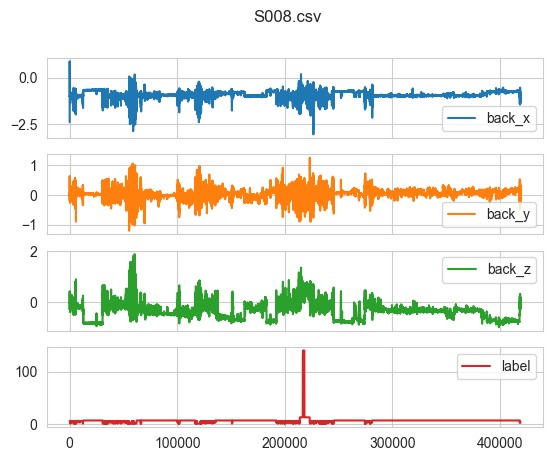

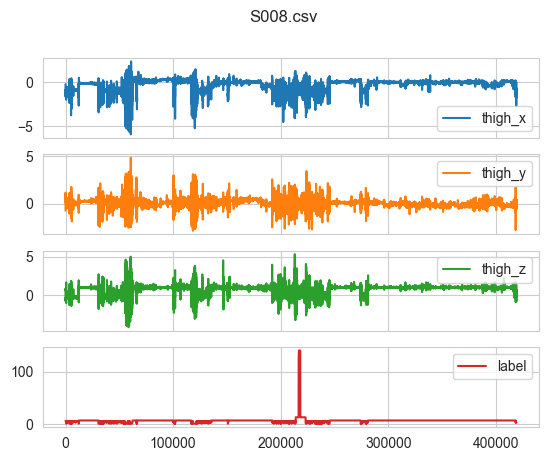

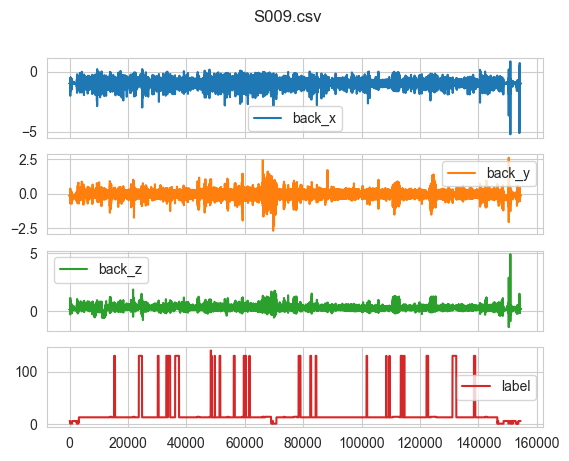

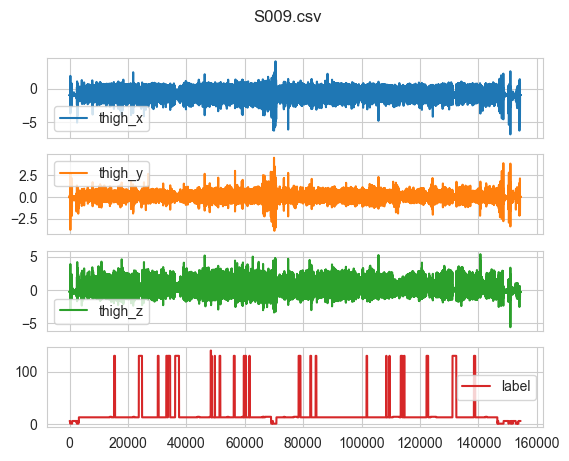

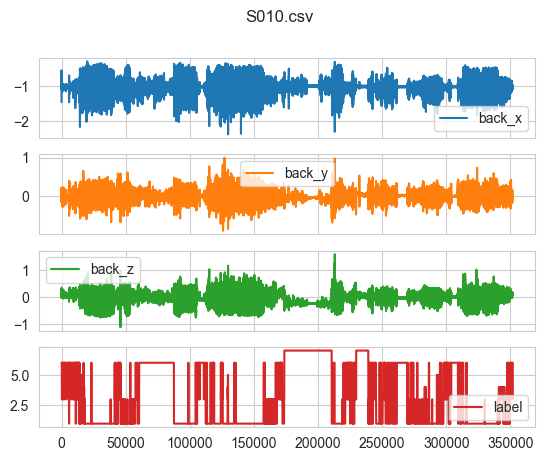

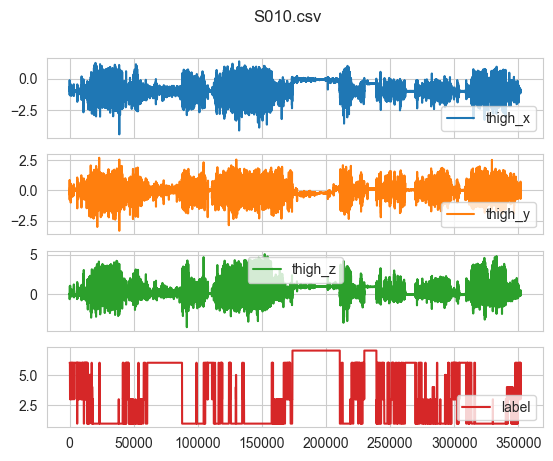

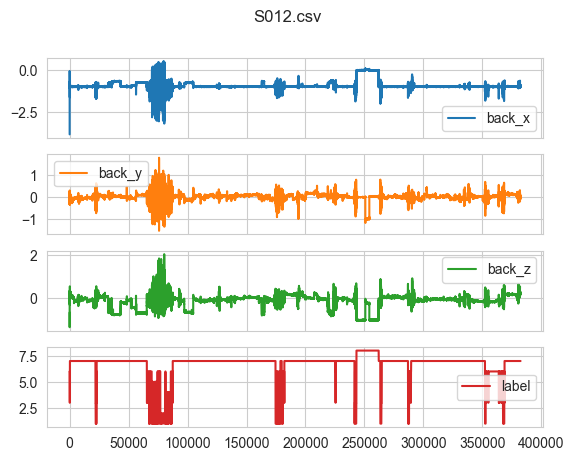

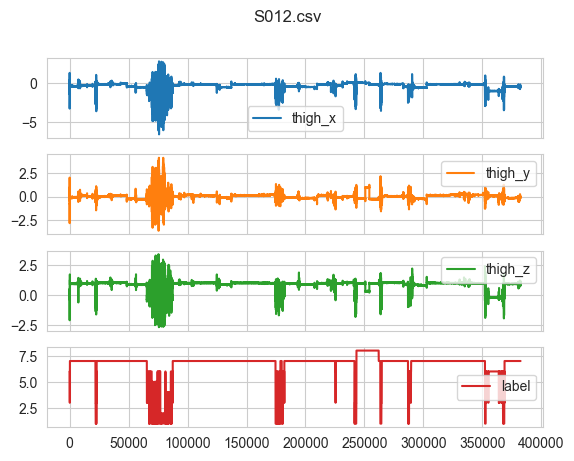

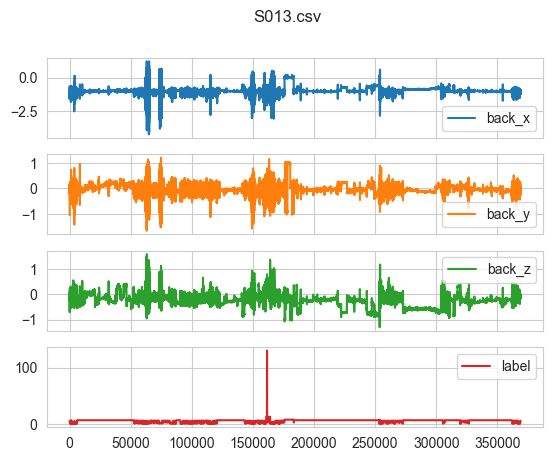

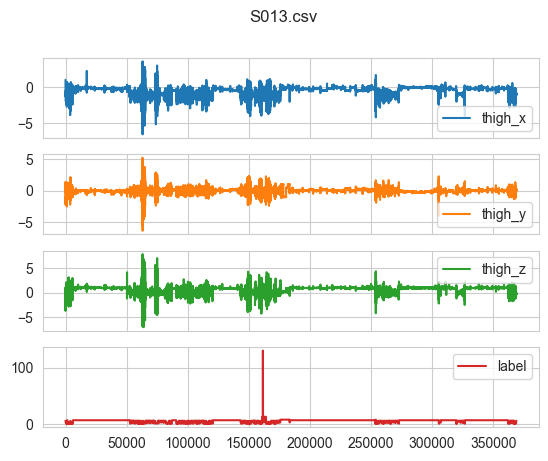

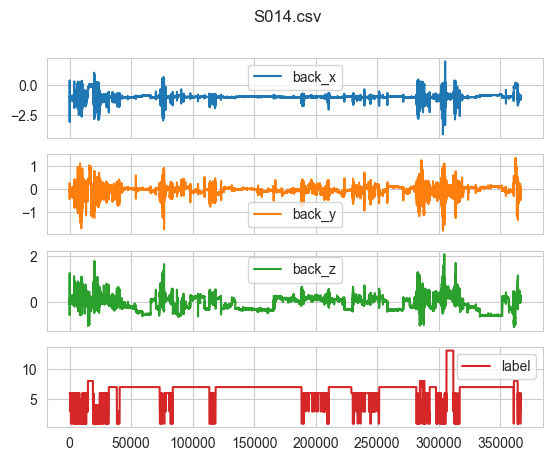

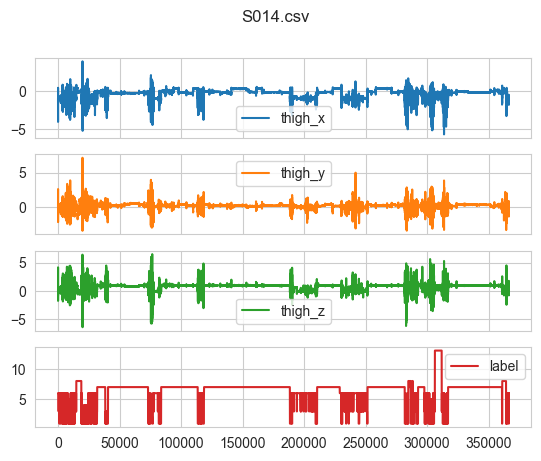

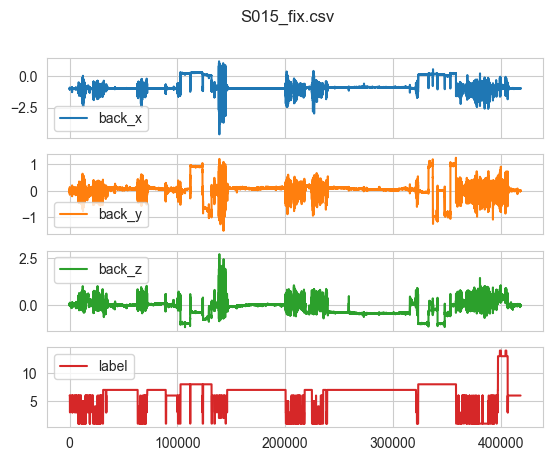

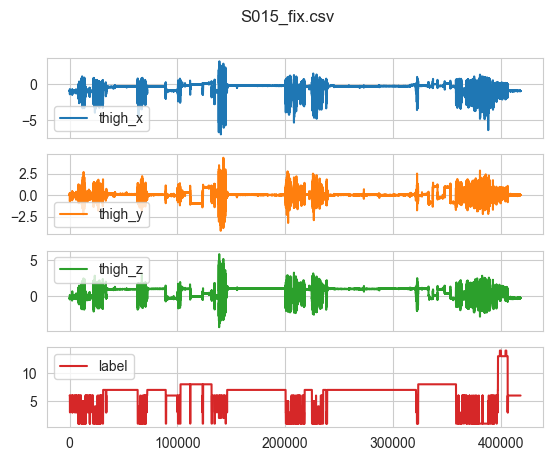

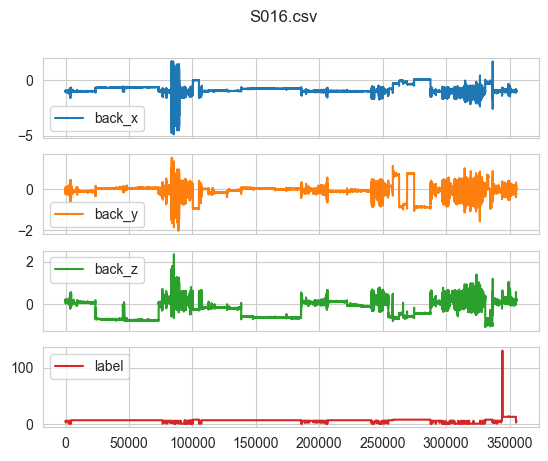

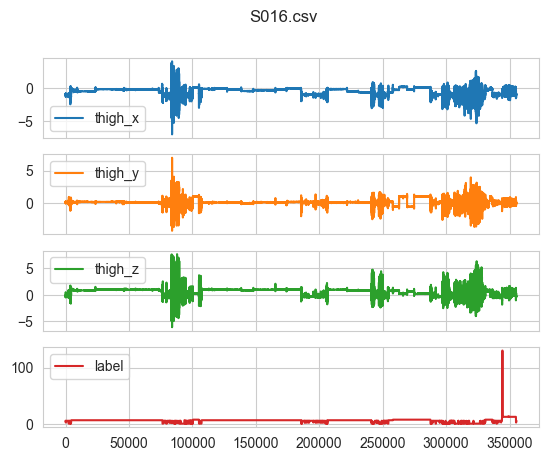

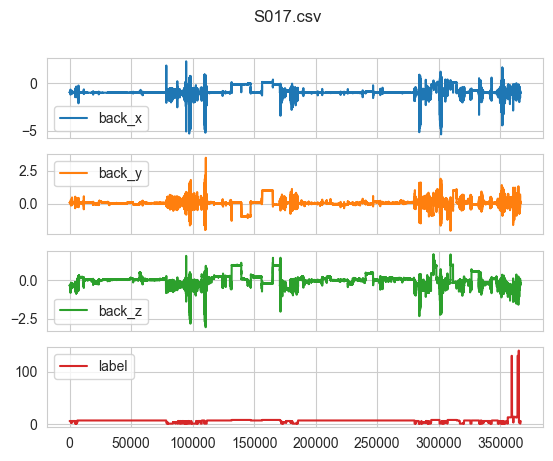

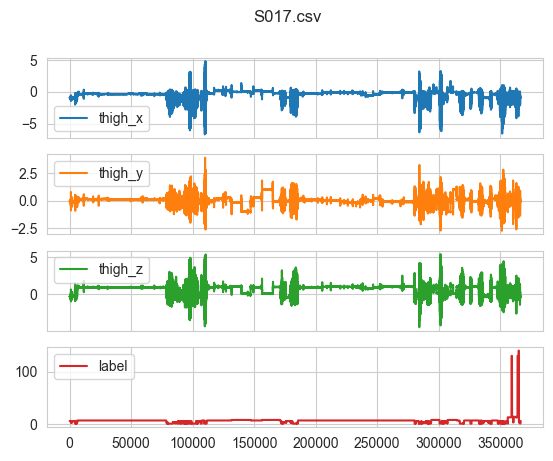

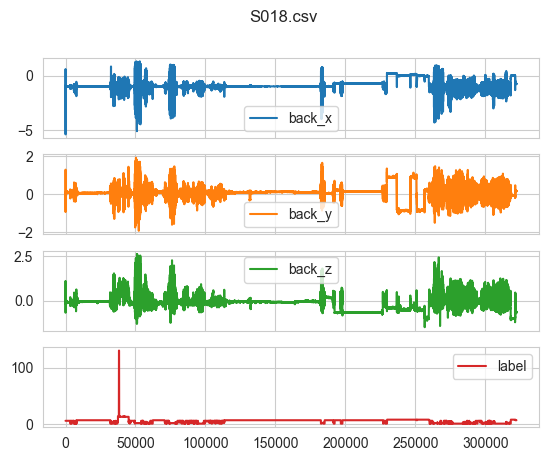

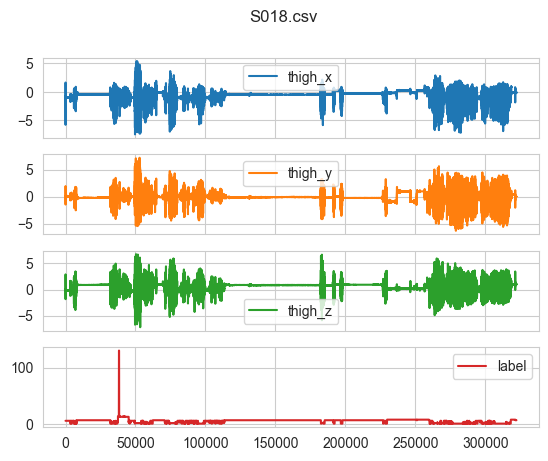

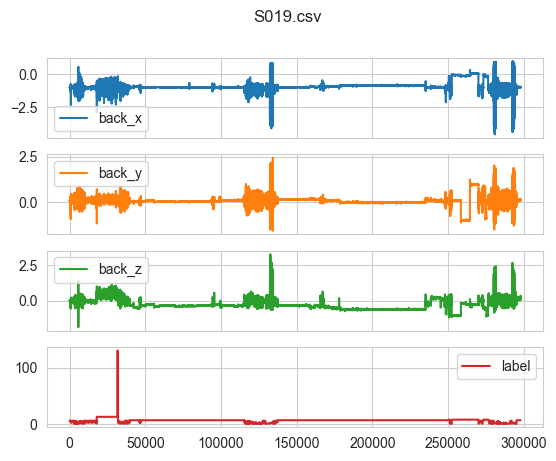

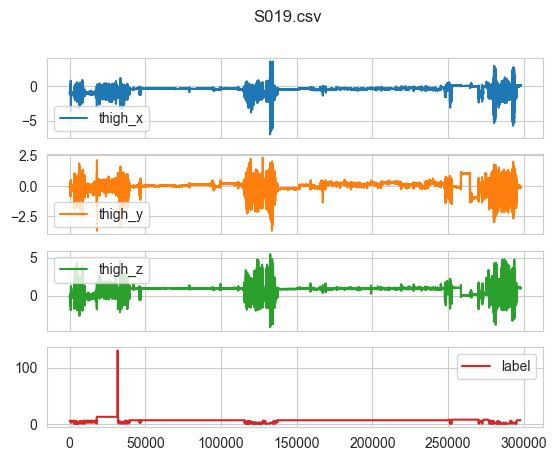

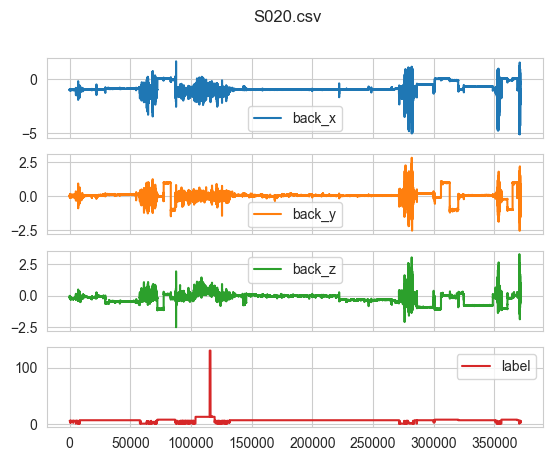

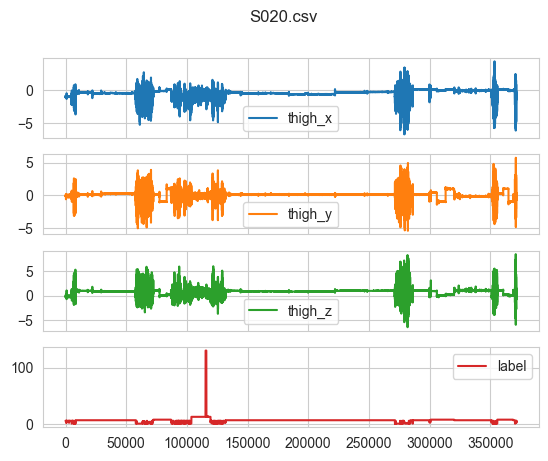

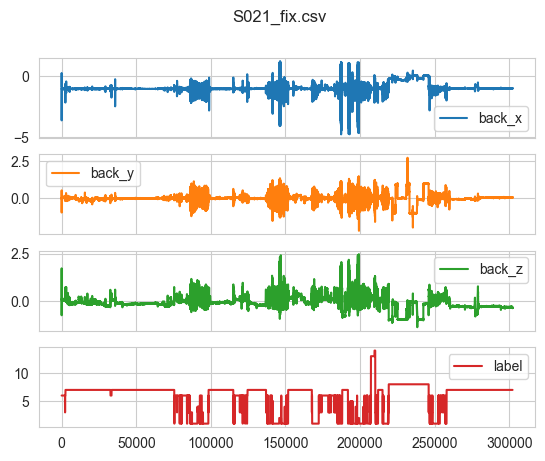

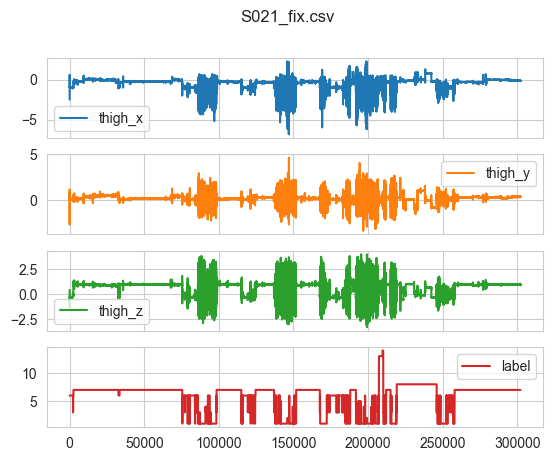

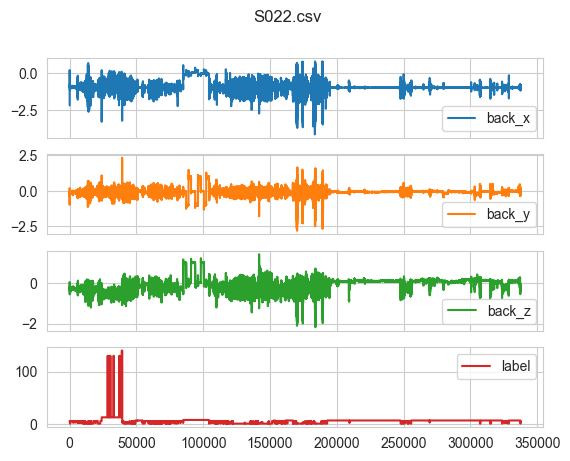

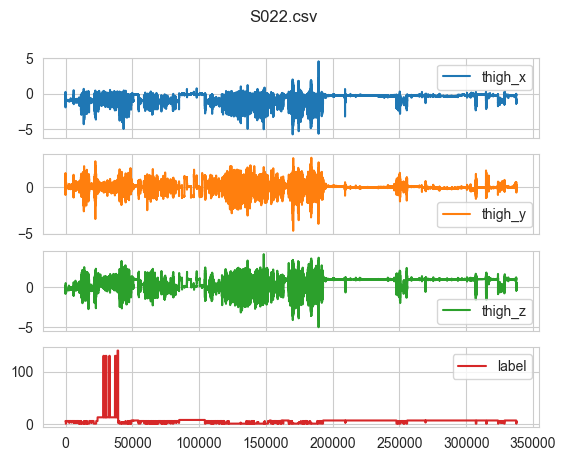

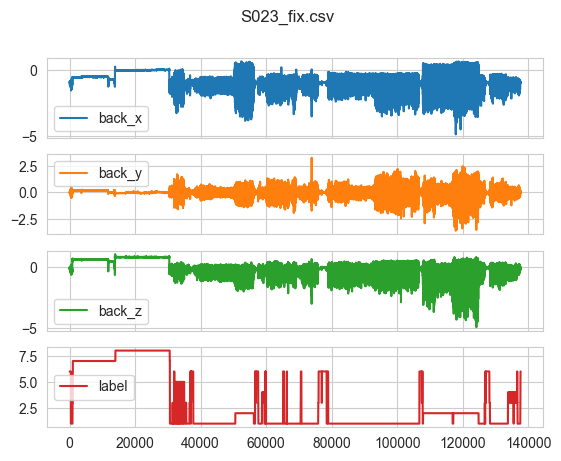

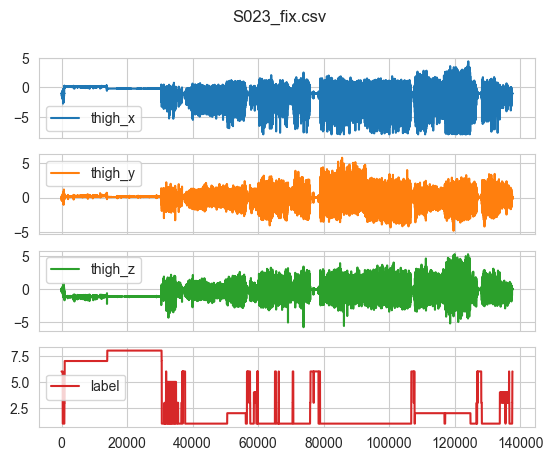

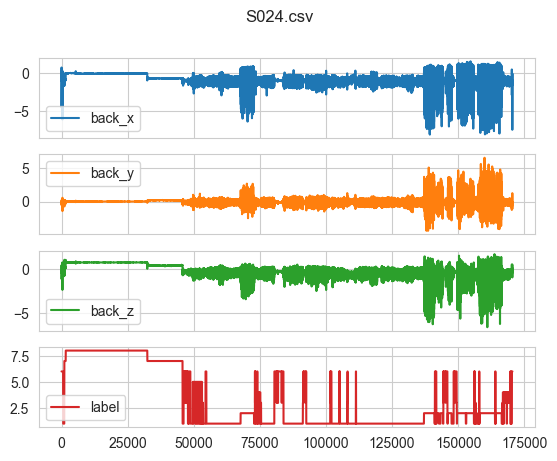

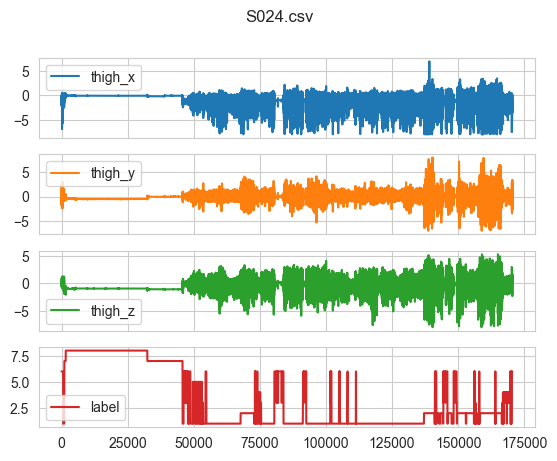

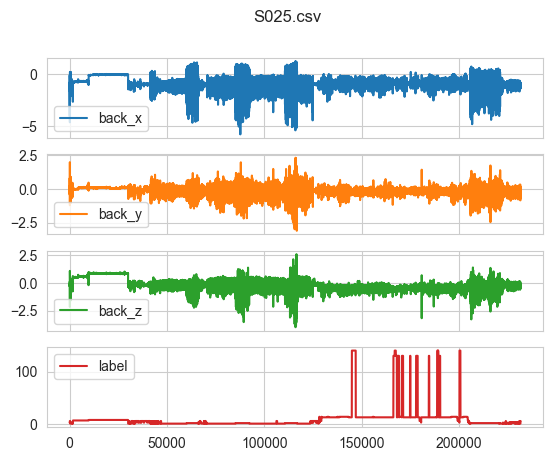

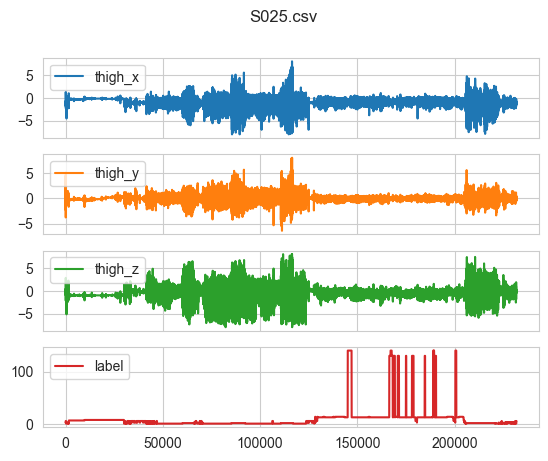

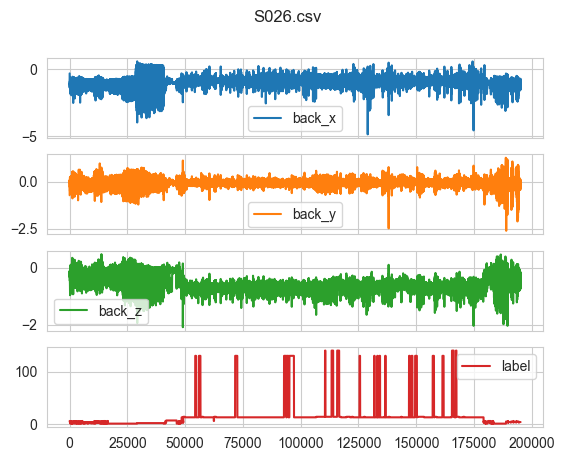

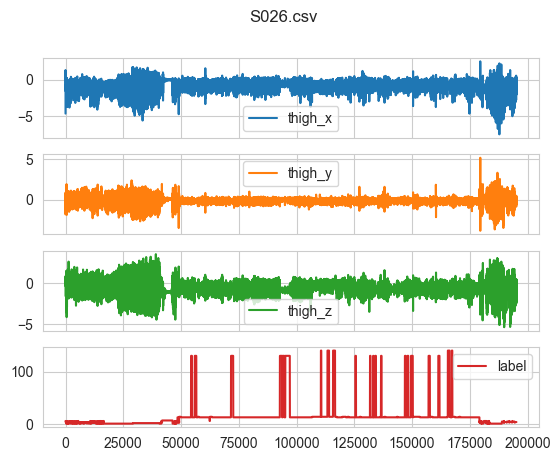

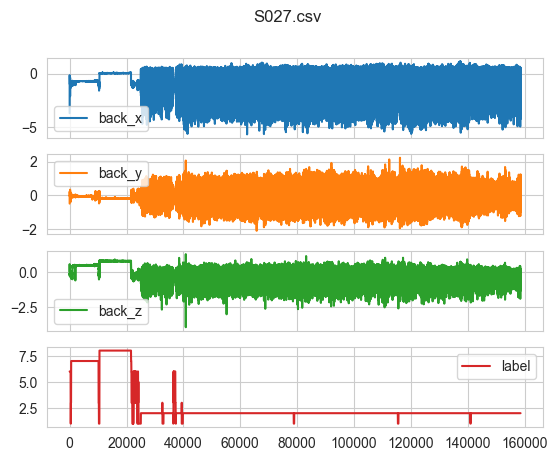

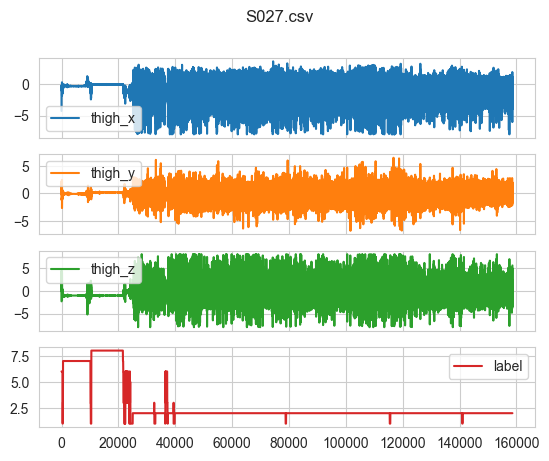

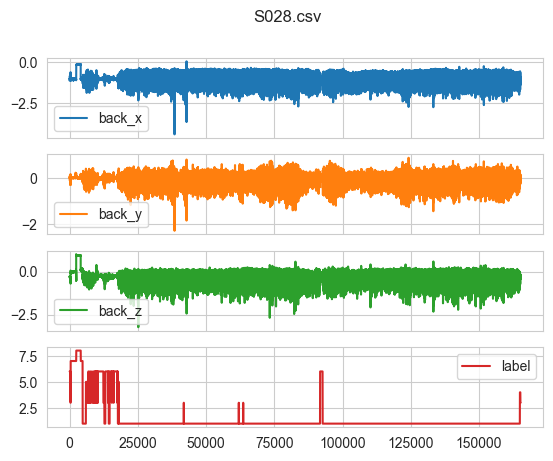

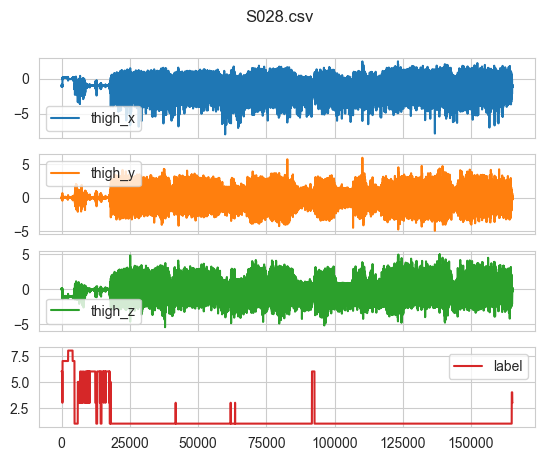

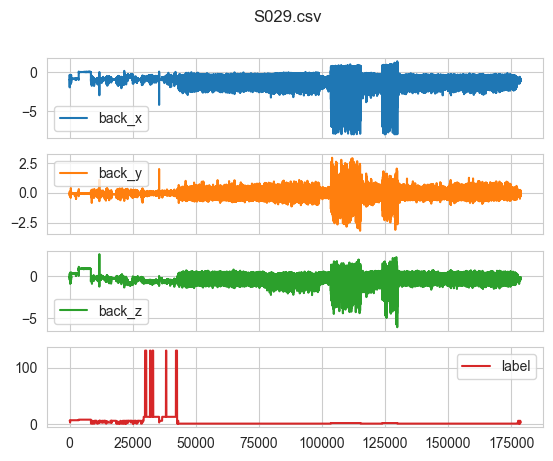

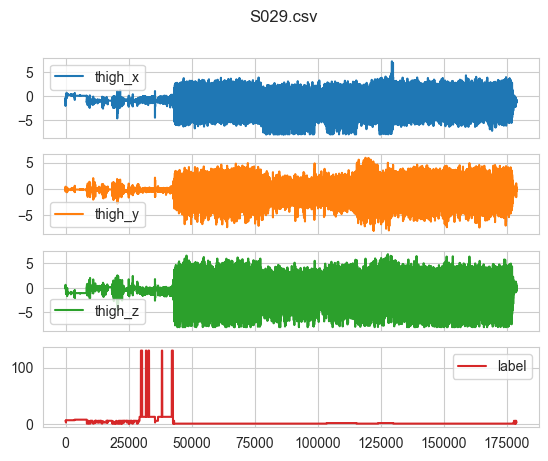

In [16]:
# Δημιουργία γραφημάτων
for file in file_list:
    df = pd.read_csv(os.path.join('harth/', file))
    df[['back_x','back_y', 'back_z', 'label']].plot(title= file, subplots=True)
    plt.show()
    df[['thigh_x','thigh_y', 'thigh_z', 'label']].plot(title= file, subplots=True)
    plt.show()

In [ ]:
# df = pd.read_csv(os.path.join('harth/', file_list[2]))
# 
# df_long = df[['thigh_x', 'thigh_y', 'thigh_z']].melt(var_name='sensor', value_name='value')
# sns.displot(df_long, x='value', hue='sensor', kde=False, bins=100)
# plt.show()

In [ ]:
df = pd.read_csv(os.path.join('harth/', file_list[7]))
my_columns = ['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']
df_selected = df[my_columns]

corr_df = df_selected.corr()
sns.heatmap(corr_df, annot=True, cmap='coolwarm')
plt.title('df_combined')
plt.show()